In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector
import matplotlib.cm as cm
from lane_detection import *
from lane_following import *


[[[ 879  378  975  735]]

 [[ 750  861  774  627]]

 [[1002  833 1068 1079]]

 [[ 774  626  793  437]]

 [[ 730 1055  752  846]]]
tried to detect lanes
strafe left
turn Left


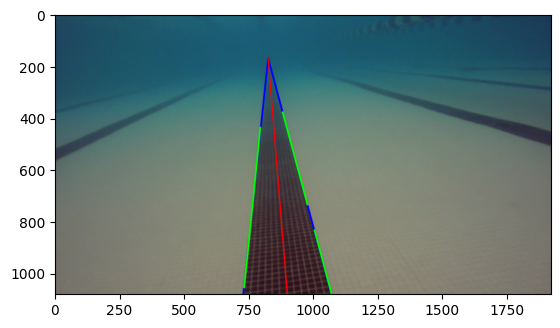

[[[ 710  904  762  632]]

 [[1016  887 1053 1039]]

 [[ 773  569  805  403]]]
tried to detect lanes
strafe left
turn Left


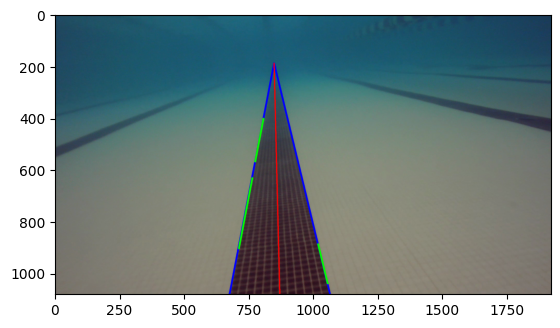

[[[ 899  470  961  759]]

 [[ 659 1079  728  824]]

 [[ 715  873  763  693]]

 [[ 987  875 1030 1077]]

 [[ 768  670  808  518]]]
tried to detect lanes
strafe left
turn right


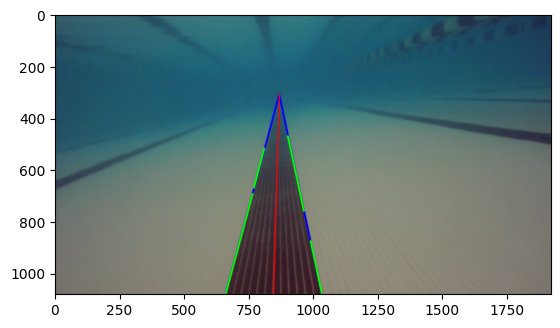

[[[902 595 969 939]]

 [[732 882 795 678]]

 [[921 688 971 945]]]
tried to detect lanes
strafe left
turn right


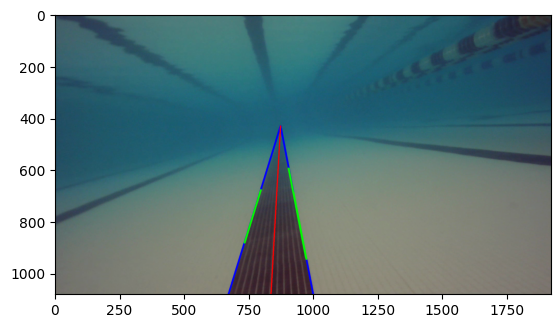

[[[ 903  739  954  958]]

 [[ 705  953  789  658]]

 [[ 935  873  982 1078]]]
tried to detect lanes
strafe left
turn right


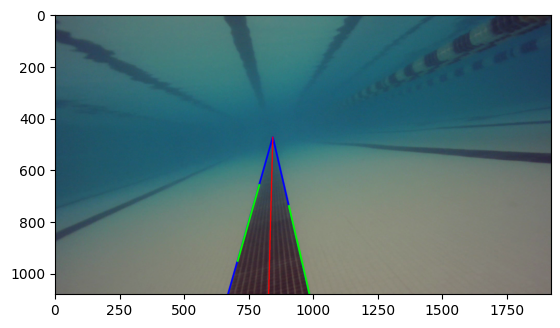

[[[ 617 1006  700  788]]

 [[ 843  635  882  886]]

 [[ 876  852  902 1021]]

 [[ 665  878  732  703]]]
tried to detect lanes
strafe left
turn right


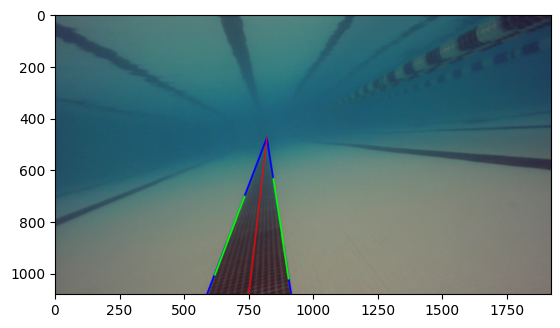

[[[ 434 1076  637  709]]

 [[ 434 1078  536  893]]]
tried to detect lanes
strafe left
turn right


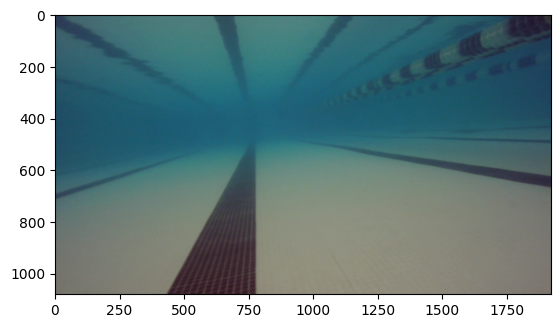

[[[ 340 1076  511  802]]

 [[ 689 1045  702  858]]]
tried to detect lanes
strafe left
turn Left


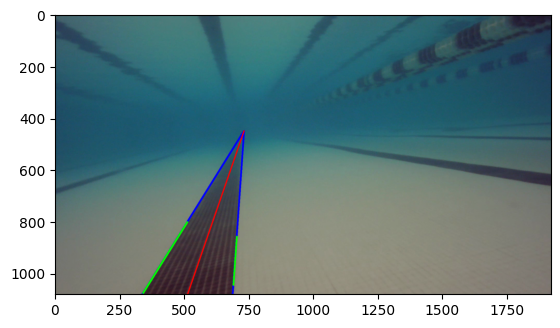

[[[ 276 1067  377  912]]

 [[ 367  930  478  753]]]
tried to detect lanes
strafe left
turn Left


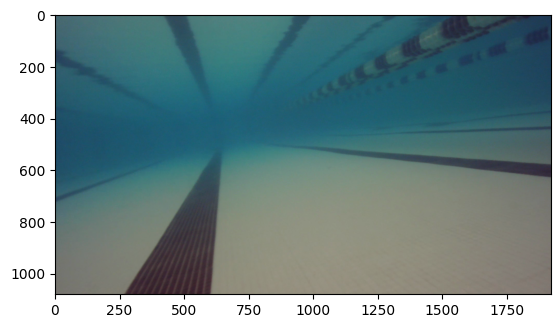

None
strafe left
turn Left


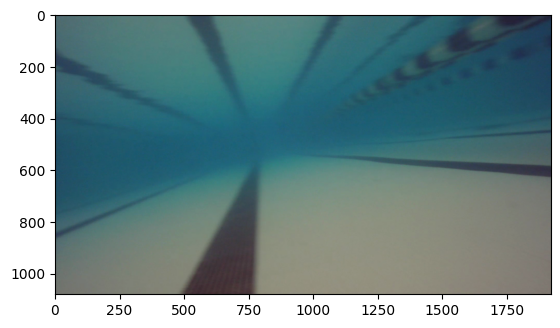

[[[ 825 1010  934  812]]]
tried to detect lanes
strafe left
turn Left


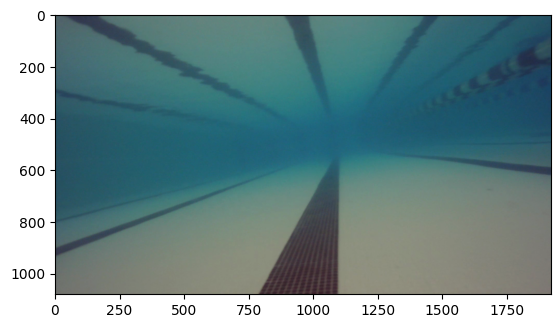

[[[ 898  986 1036  676]]

 [[ 886 1014  984  793]]

 [[1173  894 1195 1079]]

 [[1155  735 1174  897]]]
tried to detect lanes
strafe right
turn right


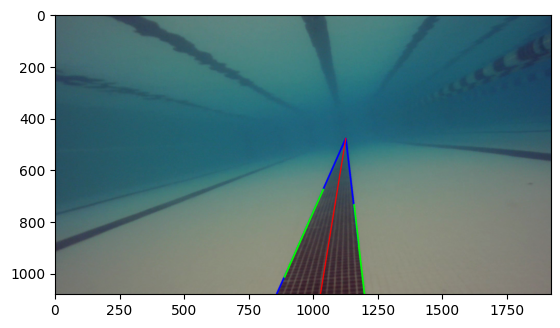

[[[1155  682 1201  923]]

 [[ 919  932 1007  705]]

 [[ 864 1068  932  898]]]
tried to detect lanes
strafe right
turn right


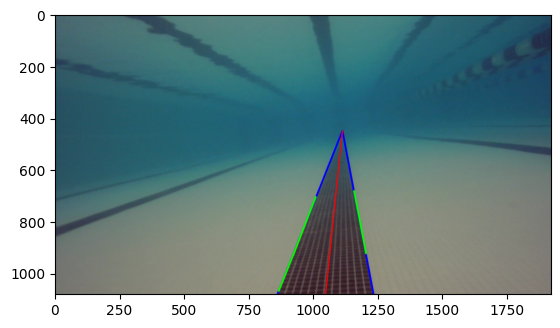

[[[ 827 1079 1012  597]]

 [[ 885  927  973  698]]

 [[1132  654 1175  855]]

 [[1185  891 1225 1079]]]
tried to detect lanes
strafe right
turn right


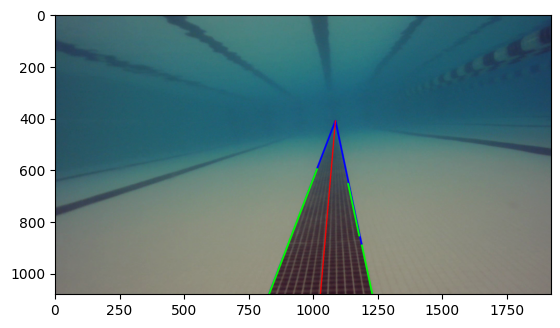

[[[1071  540 1136  799]]

 [[ 799 1079  885  843]]

 [[1156  877 1210 1079]]

 [[ 886  841  971  618]]]
tried to detect lanes
strafe right
turn right


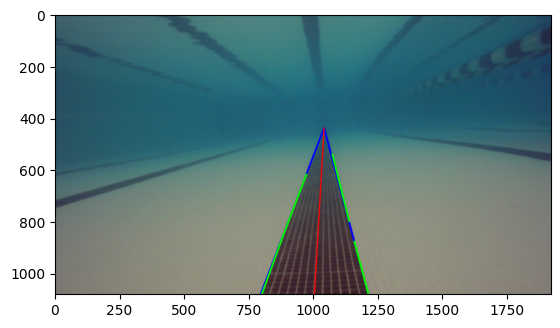

[[[ 801 1009  877  790]]

 [[1091  742 1179 1033]]

 [[1062  645 1147  925]]

 [[ 879  787  934  627]]

 [[1068  919 1088 1079]]]
tried to detect lanes
strafe right
turn right


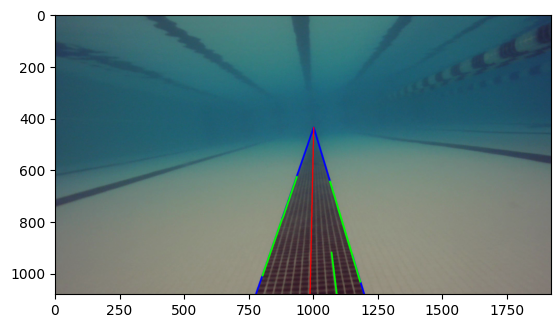

[[[1071  777 1151 1036]]

 [[ 860  849  912  696]]

 [[1035  659 1110  905]]]
tried to detect lanes
strafe right
turn right


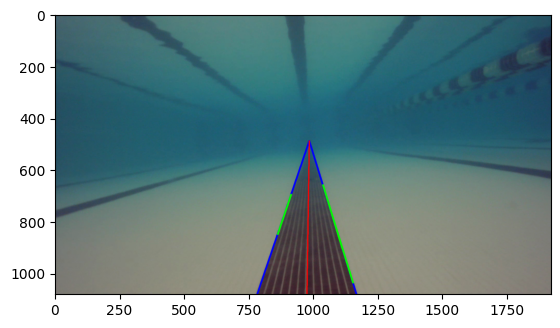

[[[ 989  667 1089  991]]

 [[ 761 1077  864  778]]]
tried to detect lanes
strafe left
turn right


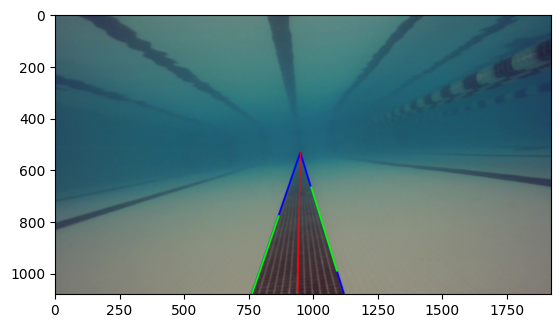

[[[ 947  654 1025  942]]

 [[1000  848 1050 1034]]]
tried to detect lanes
strafe left
turn right


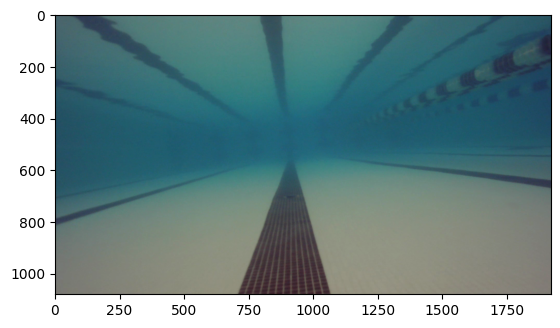

[[[ 907  616  963  858]]

 [[ 641 1078  750  822]]

 [[ 962  860 1008 1061]]]
tried to detect lanes
strafe left
turn right


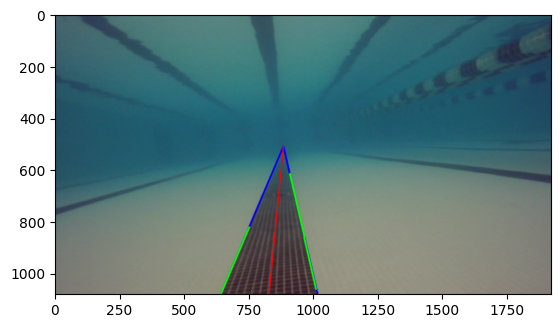

[[[ 883  625  924  879]]

 [[ 574 1079  649  925]]

 [[ 910  790  955 1075]]]
tried to detect lanes
strafe left
turn right


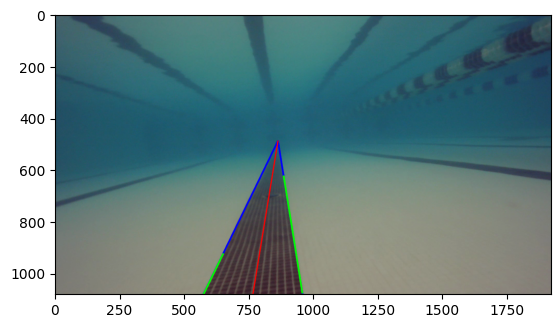

In [2]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

i = 0
ret = True
while ret:
    if i > 3000:
        break
    slopeSet = set() 
    i += 1
    ret, frame = cap.read()
    if(i%50 == 0 and i > 90):
        lines = detect_lines(frame, 50, 90, 3,150,10)
        print (lines)
    
        #try: 
        #    frame = draw_lines(frame, lines,(0, 255, 0))
        #    print ("tried to draw lines")
        #except :
       #     pass
        try:
            lanes = detect_lanes(lines)
            print ("tried to detect lanes")
            pickedLane = pick_lane(lanes)
            frame = draw_Single_lane(frame, pickedLane, (255, 0, 0))
            frame = draw_lines(frame, lines,(0, 255, 0))
            center_intercept, center_slope = get_lane_center(pickedLane)
            xPoint = pickedLane[0][2]
            yPoint = pickedLane[0][3]
            cv2.line(frame, (int(center_intercept), 1080), (int(xPoint), int(yPoint)), (0,0,255), 3)
        except:
            pass
        
        
        recommend_direction(center_intercept, center_slope)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()
        

        